In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv('ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [53]:
df = df.drop('timestamp', axis=1)
df.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [54]:
matrix = pd.pivot_table(df, values='rating', index='userId', columns='movieId')


In [55]:
## cria a matriz B
b = matrix.copy()


In [56]:
## substitui um elemento aleatório que não seja NAN da matriz B por um valor aleatorio de 0 a 5.\n",
i = np.random.randint(0, b.shape[0])
j = np.random.randint(0, b.shape[1])
while np.isnan(b.iloc[i, j]):
    i = np.random.randint(0, b.shape[0])
    j = np.random.randint(0, b.shape[1])
print(i, j)
print(b.iloc[i, j])
b.iloc[i, j] = np.random.randint(5, 51)/10
print(b.iloc[i, j])

14 692
4.0
2.7


In [57]:
## substitui os NANs da matriz B por 2.5
b = b.fillna(2.75)

In [58]:
b = b.to_numpy()

In [59]:
def selecionar_K_primeiros_valores (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [60]:
from scipy.linalg import svd, diagsvd

## calcula a SVD da matriz B
U, s, Vt = svd(b)


In [61]:
import matplotlib.pyplot as plt


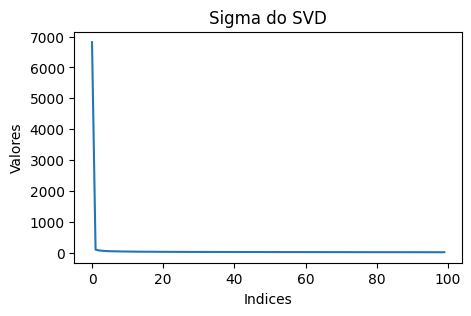

In [62]:
plt.figure(figsize=(5, 3))
plt.title('Sigma do SVD')
plt.xlabel('Indices')
plt.ylabel('Valores')
plt.plot(s[:100])
plt.show()

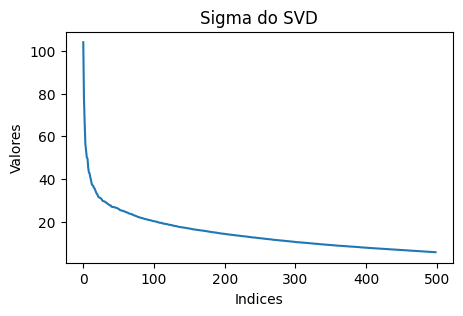

In [63]:
## plot the s values
plt.figure(figsize=(5, 3))
plt.title('Sigma do SVD')
plt.xlabel('Indices')
plt.ylabel('Valores')
plt.plot(s[1:500])
plt.show()

In [64]:
#retira os K ultimos valores das matrizes U, s e Vt

U_, s_, Vt_ = selecionar_K_primeiros_valores(U, s, Vt, 25)

In [65]:
## reconstrói a matriz B com a retirada do ruido a partir da SVD
B_ = U_ @ diagsvd(s_, U_.shape[1], Vt_.shape[0]) @ Vt_

# ## compara o valor da matriz original, da matriz B e da matriz B_ (com ruido retirado)
# for i in range(len(ratings)):
#     print(f"valor_original{i} : {ratings[i]}")
#     print(f"valor ruidoso: {i} : {b[users[i], movies[i]]}")
#     print(f"valor apos retirada do ruido{i} : {B_[users[i], movies[i]]}")
#     print(f"diferenca{i}: {b[users[i], movies[i]] - B_[users[i], movies[i]]}")
print(matrix.iloc[i, j])
print(b[i, j])
print(B_[i, j])




4.0
2.7
2.679297064089653


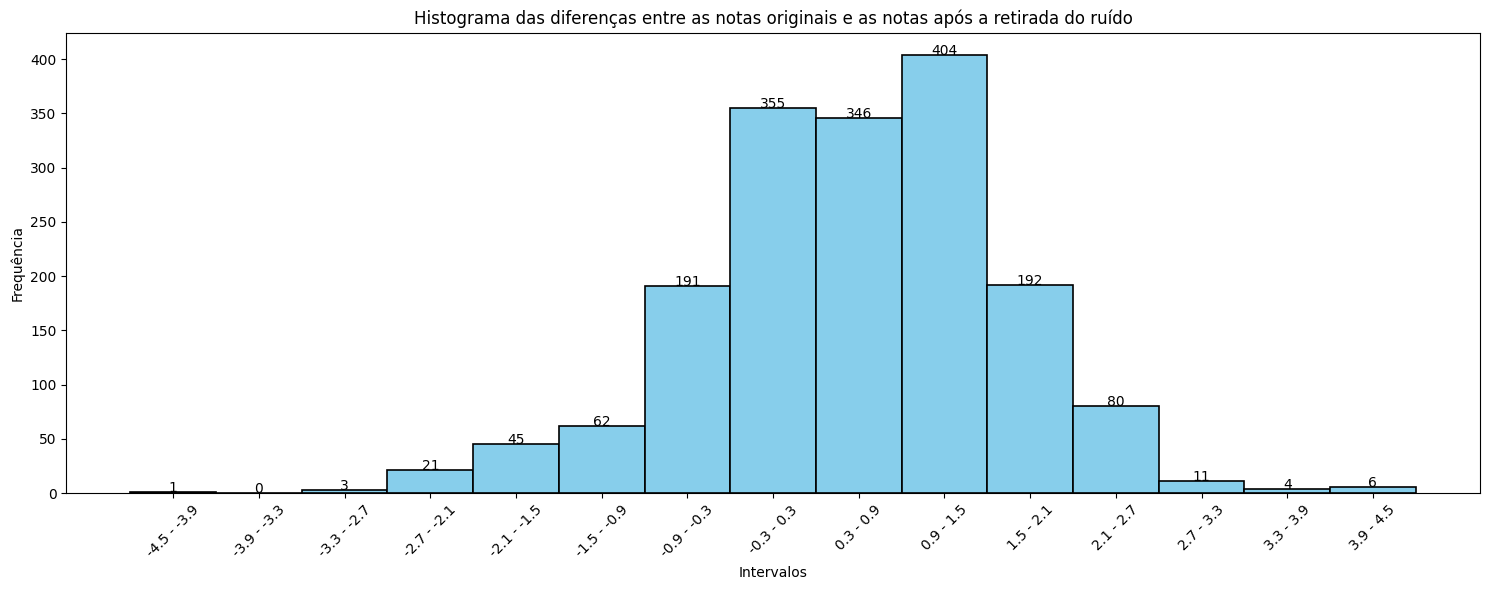

In [66]:
## Plot do Histograma de erros Original
import numpy as np
import matplotlib.pyplot as plt

# Função para ler os valores do arquivo txt
def read_values_from_file(file_path):
    with open(file_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
    return values

# Intervalos desejados para o histograma
bin_edges = [-4.5,-3.9,-3.3,-2.7,-2.1 ,-1.5 ,-0.9, -0.3, 0.3, 0.9, 1.5, 2.1, 2.7, 3.3, 3.9, 4.5]

# Função para criar o histograma
def create_histogram(values, bin_edges):
    plt.figure(figsize=(15, 6))
    n, bins, patches = plt.hist(values, bins=bin_edges, color='skyblue', edgecolor='black', linewidth=1.2)
    
    # Adiciona rótulos personalizados ao eixo x
    bin_labels = []
    for i in range(len(bin_edges) - 1):
        bin_labels.append(f"{bin_edges[i]} - {bin_edges[i+1]}")
    
    plt.xticks([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)], bin_labels, rotation=45)

    # Adiciona anotações com os valores acima de cada bin
    for i in range(len(bins) - 1):
        plt.text((bins[i] + bins[i + 1]) / 2, n[i] + 0.1, int(n[i]), ha='center', fontsize=10)

    plt.xlabel('Intervalos')
    plt.ylabel('Frequência')
    plt.title('Histograma das diferenças entre as notas originais e as notas após a retirada do ruído')
    plt.tight_layout()
    plt.show()

file_path = 'diferenças.txt'

values = read_values_from_file(file_path)
# Cria e exibe o histograma
create_histogram(values, bin_edges)



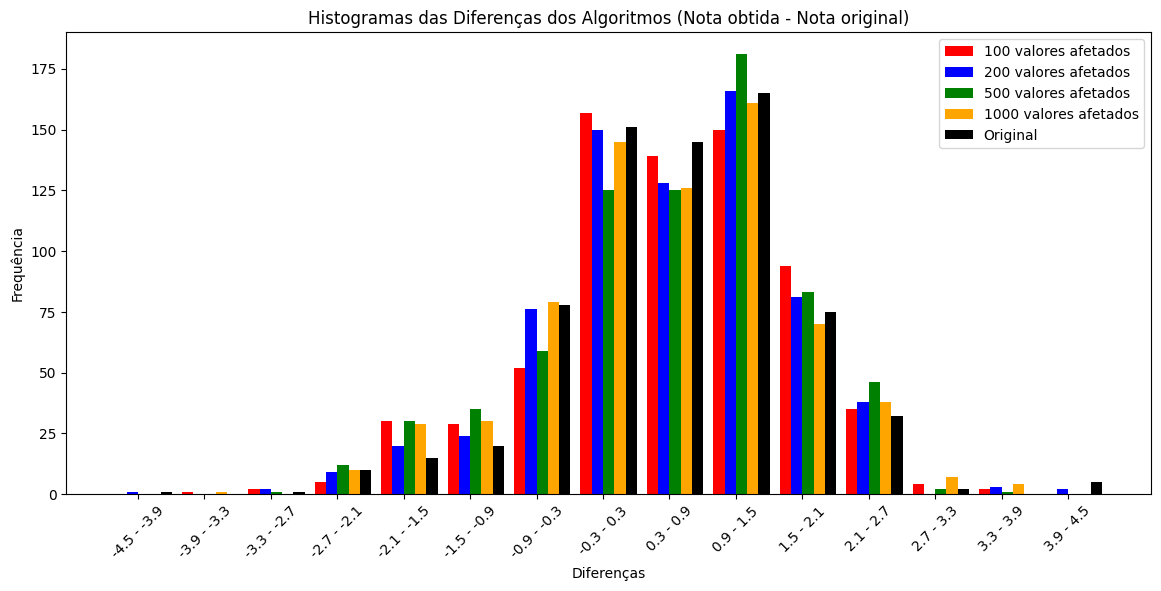

In [67]:
## CRIAÇÃO DOS HISTOGRAMAS PARA OS DADOS COM RUÍDO


# Ler os dados dos arquivos txt
def read_data(filename):
    with open(filename, 'r') as f:
        data = [float(line.strip()) for line in f.readlines()]
    return data

files = ['test_stress/diferenças_100.txt', 'test_stress/diferenças_200.txt', 'test_stress/diferenças_500.txt', 'test_stress/diferenças_1000.txt', 'test_stress/original.txt']
labels = ['100 valores afetados', '200 valores afetados', '500 valores afetados', '1000 valores afetados', 'Original']
data = [read_data(file) for file in files]

# Definir bins
bin_edges = [-4.5, -3.9, -3.3, -2.7, -2.1, -1.5, -0.9, -0.3, 0.3, 0.9, 1.5, 2.1, 2.7, 3.3, 3.9, 4.5]

# Cores para os histogramas
colors = ['red', 'blue', 'green', 'orange', 'black']

# Calcular frequências para cada arquivo e bin
hist_data = [np.histogram(d, bins=bin_edges)[0] for d in data]

# Plotar os histogramas
plt.figure(figsize=(14, 6))
bar_width = 0.17
bar_positions = np.arange(len(bin_edges) - 1)

for i, hist in enumerate(hist_data):
    plt.bar(bar_positions + i * bar_width, hist, width=bar_width, color=colors[i], label=labels[i])

bin_labels = []
for i in range(len(bin_edges) - 1):
    bin_labels.append(f"{bin_edges[i]} - {bin_edges[i+1]}")
plt.xticks(bar_positions + bar_width * 1.5, bin_labels, rotation=45)

plt.xlabel('Diferenças')
plt.ylabel('Frequência')
plt.legend()
plt.title('Histogramas das Diferenças dos Algoritmos (Nota obtida - Nota original)')
plt.show()


